In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

hm_epochs = 10
n_classes = 10
batch_size = 128

x = tf.placeholder('float', [None, 784])
y = tf.placeholder('float')

keep_rate = 0.8
keep_prob = tf.placeholder(tf.float32)


def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1, 1, 1], padding='SAME')

def maxpool2d(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')


def convolutional_neural_network(x):
    weights = {'W_conv1':tf.Variable(tf.random_normal([3,3,1,32])),
               'W_conv2':tf.Variable(tf.random_normal([3,3,32,64])),
               'W_fc':tf.Variable(tf.random_normal([7*7*64, 1024])),
               'out':tf.Variable(tf.random_normal([1024, n_classes]))}
    
    biases = {'b_conv1':tf.Variable(tf.random_normal([32])),
               'b_conv2':tf.Variable(tf.random_normal([64])),
               'b_fc':tf.Variable(tf.random_normal([1024])),
               'out':tf.Variable(tf.random_normal([n_classes]))}
    
    x = tf.reshape(x, shape=[-1, 28, 28, 1])
    
    conv1 = conv2d(x, weights['W_conv1'])
    conv1 = maxpool2d(conv1)
    
    conv2 = conv2d(conv1, weights['W_conv2'])
    conv2 = maxpool2d(conv2)
    
    fc = tf.reshape(conv2, [-1, 7*7*64])
    fc = tf.nn.relu(tf.matmul(fc, weights['W_fc']) + biases['b_fc'])
    
    fc = tf.nn.dropout(fc, keep_rate)
    
    output = tf.matmul(fc, weights['out']+biases['out'])    
    
    return output


def train_neural_network(x):
    prediction = convolutional_neural_network(x)
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y))
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for epoch in range(hm_epochs):
            epoch_loss = 0
            for _ in range(int(mnist.train.num_examples/batch_size)):
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                _, c = sess.run([optimizer, cost], feed_dict={x: epoch_x, y: epoch_y})
                epoch_loss += c
            
            print('Epoch', epoch+1, 'completed out of', hm_epochs, 'loss', epoch_loss)
            
            
            correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
            accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
            accur = accuracy.eval({x:mnist.test.images, y:mnist.test.labels})
            print('Accuracy:', accur)
            acc.append(accur)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
acc_all = []
for _ in range(10):
    acc = []
    train_neural_network(x)
    acc_all.append(acc)

Epoch 1 completed out of 10 loss 20466895.02
Accuracy: 0.6
Epoch 2 completed out of 10 loss 78231.2222404
Accuracy: 0.5856
Epoch 3 completed out of 10 loss 27903.5901589
Accuracy: 0.5267
Epoch 4 completed out of 10 loss 13353.2970777
Accuracy: 0.4682
Epoch 5 completed out of 10 loss 7743.80830932
Accuracy: 0.4416
Epoch 6 completed out of 10 loss 5046.91020203
Accuracy: 0.4093
Epoch 7 completed out of 10 loss 3373.8286016
Accuracy: 0.3787
Epoch 8 completed out of 10 loss 2400.07865191
Accuracy: 0.3745
Epoch 9 completed out of 10 loss 1893.13039613
Accuracy: 0.364
Epoch 10 completed out of 10 loss 1427.96784937
Accuracy: 0.3575
Epoch 1 completed out of 10 loss 5017978.15591
Accuracy: 0.8739
Epoch 2 completed out of 10 loss 208702.52993
Accuracy: 0.916
Epoch 3 completed out of 10 loss 107583.20787
Accuracy: 0.9268
Epoch 4 completed out of 10 loss 65630.8993549
Accuracy: 0.9402
Epoch 5 completed out of 10 loss 43879.5460386
Accuracy: 0.9445
Epoch 6 completed out of 10 loss 33923.9018936
Ac

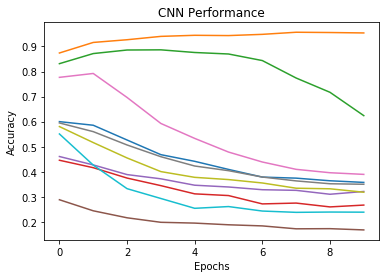

In [4]:
import matplotlib.pyplot as plt
plt.title('CNN Performance')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
for elem in acc_all:
    plt.plot(elem)
plt.show()

In [5]:
max(acc_all)

[0.8739,
 0.91600001,
 0.92680001,
 0.94019997,
 0.94450003,
 0.94340003,
 0.9483,
 0.95670003,
 0.95560002,
 0.95389998]